(optional)

# **HW5: Brain signal classification**
In *HW 5*, you need to finish:

1.  Model Implementation Part: Implement LSTM and EEGNet models to predict the label of each samples.

2.  Model Competition Part: Implementing a model to reach better accuracy performance.

In [ ]:
import numpy as np
import os
import math
import csv
import matplotlib.pyplot as plt
# Import the packages you need here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
data = np.load('data.npz')
label = np.load('label.npz')

In [ ]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']

Y_train = label['Y_train'].astype(int)
Y_val = label['Y_val'].astype(int)



Y_train = np.eye(6)[Y_train]
Y_val = np.eye(6)[Y_val]


In [ ]:
X_train.shape, X_val.shape, X_test.shape

((604, 22, 200), (152, 22, 200), (190, 22, 200))

In [ ]:
Y_train.shape, Y_val.shape

((604, 1, 6), (152, 1, 6))

In [ ]:

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[2],-1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[2],-1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[2],-1))
print(X_train.shape, X_val.shape, X_test.shape)

Y_train = np.reshape(Y_train,(Y_train.shape[0],Y_train.shape[2]))
Y_val = np.reshape(Y_val,(Y_val.shape[0],Y_val.shape[2]))
print(Y_train.shape, Y_val.shape)

(604, 200, 22) (152, 200, 22) (190, 200, 22)
(604, 6) (152, 6)


## Model Implementation Part

### LSTM

In [ ]:
# Build your model here:
model = keras.models.Sequential()
model.add(layers.LSTM(units = 64, return_sequences = True, input_shape = (200, 22)))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.1))
#model.add(LSTM(units = 64, return_sequences = False, activation = 'relu'))
#model.add(layers.TimeDistributed(Dense(1)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

metrics = ["accuracy"]

In [ ]:
# 引入 time 模組
import time

# 開始測量
start = time.time()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
#model.fit(X_train, Y_train, epochs = 100, batch_size = 64)

history = model.fit(X_train, Y_train, epochs=30, 
                    validation_data=(X_val, Y_val))
model.summary()


# 結束測量
end = time.time()

# 輸出結果
print("執行時間：%f 秒" % (end - start))
model.summary()

Epoch 1/30
19/19 [==============================] - 2s 40ms/step - loss: 0.6855 - accuracy: 0.7467 - val_loss: 0.2735 - val_accuracy: 0.9211
Epoch 2/30
19/19 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9917 - val_loss: 0.1534 - val_accuracy: 0.9408
Epoch 3/30
19/19 [==============================] - 0s 14ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 0.9474
Epoch 4/30
19/19 [==============================] - 0s 14ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1342 - val_accuracy: 0.9474
Epoch 5/30
19/19 [==============================] - 0s 11ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9539
Epoch 6/30
19/19 [==============================] - 0s 14ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1304 - val_accuracy: 0.9539
Epoch 7/30
19/19 [==============================] - 0s 11ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1295 - val_accuracy: 0.9539
Epoch 8/30
19

In [ ]:
#output = model.predict(X_val)

    
pred_test = model.predict(X_val)
#print(pred_test)
pred_test = np.argmax(pred_test, axis = 1)
pred_test = pred_test.astype(int)

for i in range(5):
    print(pred_test[i],Y_val[i])

5/5 [==============================] - 0s 5ms/step
4 [0. 0. 0. 0. 1. 0.]
5 [0. 0. 0. 0. 0. 1.]
1 [0. 1. 0. 0. 0. 0.]
2 [0. 0. 1. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0.]


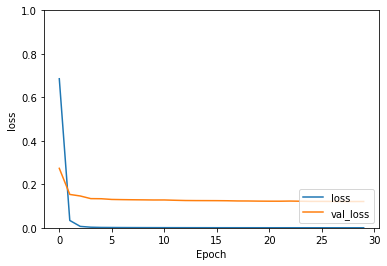

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
output = model.predict(X_test)
    
output = np.argmax(output, axis = 1)
output = output.astype(int)
output = np.reshape(output,(190,1))
assert(output.shape == (190, 1))
np.savetxt('lstm_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 5ms/step


### EEGNet

In [ ]:
F1 = 10
D = 20
F2 = 10
C = 22
T = 200

In [ ]:
X_train = np.reshape(X_train,(-1,1,22,200))
X_val = np.reshape(X_val,(-1,1,22,200))
X_test = np.reshape(X_test,(-1,1,22,200))

In [ ]:
# Build your model here:
model = keras.models.Sequential()
#model.add(layers.Input(shape = (200,22)))
model.add(layers.Conv2D(F1, (1, 64), activation='linear',input_shape = (1,C,T) ,padding="same",use_bias=False,data_format = "channels_first"))
model.add(layers.BatchNormalization())
model.add(layers.DepthwiseConv2D((C, 1),padding='valid', depth_multiplier = D, activation='linear', use_bias=False,data_format = "channels_first"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.AveragePooling2D((1,4),data_format = "channels_first"))
model.add(layers.Dropout(0.25))
model.add(layers.SeparableConv2D(F2, (1, 64), activation='linear', padding="same",use_bias=False,data_format = "channels_first"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("elu"))
model.add(layers.AveragePooling2D((1,8),data_format = "channels_first"))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

model.build()

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 10, 22, 200)       640       
                                                                 
 batch_normalization_27 (Bat  (None, 10, 22, 200)      800       
 chNormalization)                                                
                                                                 
 depthwise_conv2d_9 (Depthwi  (None, 200, 1, 200)      4400      
 seConv2D)                                                       
                                                                 
 batch_normalization_28 (Bat  (None, 200, 1, 200)      800       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 200, 1, 200)       0         
                                                     

In [ ]:
# 引入 time 模組
import time

# 開始測量
start = time.time()

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
#model.fit(X_train, Y_train, epochs = 100, batch_size = 64)

history = model.fit(X_train, Y_train, epochs=30, 
                    validation_data=(X_val, Y_val))


# 結束測量
end = time.time()

# 輸出結果
print("執行時間：%f 秒" % (end - start))
model.summary()

Epoch 1/30
19/19 [==============================] - 1s 18ms/step - loss: 0.9592 - accuracy: 0.6722 - val_loss: 1.4041 - val_accuracy: 0.9211
Epoch 2/30
19/19 [==============================] - 0s 10ms/step - loss: 0.3468 - accuracy: 0.9371 - val_loss: 1.2587 - val_accuracy: 0.9342
Epoch 3/30
19/19 [==============================] - 0s 10ms/step - loss: 0.2372 - accuracy: 0.9487 - val_loss: 1.1543 - val_accuracy: 0.9803
Epoch 4/30
19/19 [==============================] - 0s 10ms/step - loss: 0.1632 - accuracy: 0.9752 - val_loss: 1.0780 - val_accuracy: 0.9868
Epoch 5/30
19/19 [==============================] - 0s 9ms/step - loss: 0.1234 - accuracy: 0.9868 - val_loss: 0.9864 - val_accuracy: 0.9868
Epoch 6/30
19/19 [==============================] - 0s 10ms/step - loss: 0.0986 - accuracy: 0.9884 - val_loss: 0.8895 - val_accuracy: 0.9737
Epoch 7/30
19/19 [==============================] - 0s 10ms/step - loss: 0.0750 - accuracy: 0.9950 - val_loss: 0.7913 - val_accuracy: 0.9868
Epoch 8/30
19/

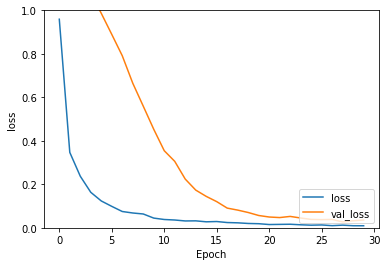

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
#plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [ ]:
output = model.predict(X_test)
    
output = np.argmax(output, axis = 1)
output = output.astype(int)
output = np.reshape(output,(190,1))
assert(output.shape == (190, 1))
np.savetxt('eegnet_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 3ms/step


## Model Competition Part

In [ ]:
# Build your model here:


In [ ]:
output = model.predict(X_test)
    
output = np.argmax(output, axis = 1)
output = output.astype(int)
output = np.reshape(output,(190,1))
assert(output.shape == (190, 1))
np.savetxt('competition_output.csv', output, delimiter=",")

6/6 [==============================] - 0s 3ms/step
